In [1]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

import torch
from dataset import CIFAR10
from torch.utils.data import DataLoader

import NoiseFactory as NF
import TransformationFactory as TF
import numpy as np

import imgaug.augmenters as iaa
import imagecorruptions
from PIL import Image
import random
from resnet20 import ResNetCIFAR

In [2]:
def set_device():
    # specify the device for computation
    #############################################
    # your code here
    device = 'cpu'
    if device =='cuda':
        print("Run on GPU...")
    else:
        print("Run on CPU...")

    return device

In [3]:
def get_training_transforms(intensity:int=0, noise = None, p:float=0.5):
    n_factory = NF.NoiseFactory()
    transforms_factory = TF.TransformationFactory()

    transform_train = transforms_factory.get_transformation_composition_by_name(transformation_set=noise, intensity=intensity, p=p)
    noise_factory_function = n_factory.get_noise_by_name(noise_type_name=noise, intensity=intensity, p=p)
    transform_val =transforms_factory.get_transformation_composition_by_name(transformation_set=None)

    return transform_train, transform_val, noise_factory_function

Using downloaded and verified file: ./data/cifar10_trainval_F22.zip
Extracting ./data/cifar10_trainval_F22.zip to ./data
Files already downloaded and verified
Run on CPU...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
----------------------------------------------------------------------


ValueError: 

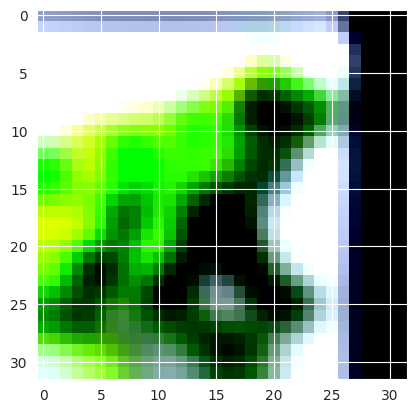

In [13]:
def example_img_plotter(img):
    plt.imshow(  img.permute(1,2,0))

transform_train, transform_val, noise_factory_function = get_training_transforms(intensity=3, noise = "gaussian-blur", p=0.5)


# a few arguments, do NOT change these
DATA_ROOT = "./data"
TRAIN_BATCH_SIZE = 128
VAL_BATCH_SIZE = 100

#############################################
# your code here
# construct dataset
train_set = CIFAR10(
    root=DATA_ROOT,
    mode='train',
    download=True,
    transform=transform_train,    # your code
    imgaug_types=noise_factory_function
)

# construct dataloader
train_loader = DataLoader(
    train_set,
    batch_size=TRAIN_BATCH_SIZE ,  # your code
    shuffle=False,     # your code
    num_workers=4
)

device = set_device()

for batch_idx, (inputs, targets) in enumerate(train_loader):
    ####################################
    for i in range(0,1):
        print(i)
        print("----------------------------------------------------------------------")
        example_img_plotter(inputs[i, :,:,:], transformation=None, imgaug=None)
    raise ValueError()

